<a href="https://colab.research.google.com/github/SanjayNithin2002/phishing-detection-api/blob/main/phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import statsmodels.api as sm
from google.colab import drive
import matplotlib
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv("/content/drive/MyDrive/dataset_website.csv")
df = df.drop(['index', 'web_traffic','Page_Rank', 'Statistical_report'], axis=1)

In [8]:
df.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,Google_Index,Links_pointing_to_page,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,0,1,1,1,1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,0,1,1,1,1,-1,-1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,0,1,1,1,1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,0,1,1,1,1,-1,-1,1,-1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,0,-1,1,-1,1,-1,-1,1,1,1


In [9]:
df.columns.tolist()

['having_IPhaving_IP_Address',
 'URLURL_Length',
 'Shortining_Service',
 'having_At_Symbol',
 'double_slash_redirecting',
 'Prefix_Suffix',
 'having_Sub_Domain',
 'SSLfinal_State',
 'Domain_registeration_length',
 'Favicon',
 'port',
 'HTTPS_token',
 'Request_URL',
 'URL_of_Anchor',
 'Links_in_tags',
 'SFH',
 'Submitting_to_email',
 'Abnormal_URL',
 'Redirect',
 'on_mouseover',
 'RightClick',
 'popUpWidnow',
 'Iframe',
 'age_of_domain',
 'DNSRecord',
 'Google_Index',
 'Links_pointing_to_page',
 'Result']

In [10]:
df.isnull()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,Google_Index,Links_pointing_to_page,Result
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11052,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11053,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
Google_Index                   0
Links_pointing_to_page         0
Result                         0
dtype: int64

In [12]:
df.isnull().sum().sum()

0

In [14]:
df.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,Google_Index,Links_pointing_to_page,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,0,1,1,1,1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,0,1,1,1,1,-1,-1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,0,1,1,1,1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,0,1,1,1,1,-1,-1,1,-1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,0,-1,1,-1,1,-1,-1,1,1,1


In [16]:
y = df["Result"]
X = df.iloc[: , :-1]

In [17]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
# search about this

Best alpha using built-in LassoCV: 0.000647
Best score using built-in LassoCV: 0.692988


In [18]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 26 variables and eliminated the other 1 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

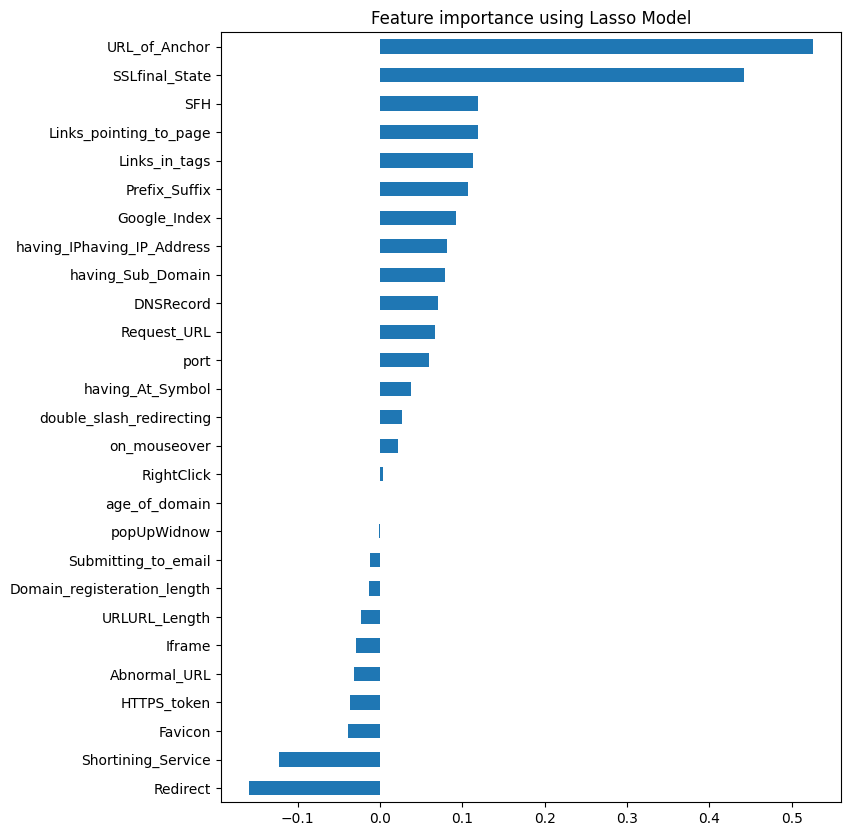

In [19]:
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [31]:
imp_coef
df.drop(['RightClick'], axis = 1)
df.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,Google_Index,Links_pointing_to_page,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,0,1,1,1,1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,0,1,1,1,1,-1,-1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,0,1,1,1,1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,0,1,1,1,1,-1,-1,1,-1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,0,-1,1,-1,1,-1,-1,1,1,1


In [30]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20, random_state=42)

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,Google_Index,Links_pointing_to_page,Result
480,1,-1,1,1,1,-1,1,1,-1,1,...,0,1,1,1,1,1,1,1,0,1
10812,-1,-1,1,1,1,-1,0,1,1,1,...,0,1,1,1,1,1,1,-1,0,-1
4064,1,1,1,1,1,1,0,1,-1,1,...,0,1,1,1,1,-1,1,-1,0,1
8225,-1,-1,-1,-1,-1,-1,1,-1,-1,1,...,0,1,1,1,1,1,-1,-1,1,1
9432,-1,-1,1,1,1,-1,-1,-1,-1,1,...,0,1,1,1,1,1,1,-1,0,-1


In [32]:
svm_model = svm.SVC().fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
svm_ascore = accuracy_score(y_test, y_pred,normalize = True)
svm_score = precision_recall_fscore_support(y_test, y_pred, average='macro')
# Calculate the confusion matrix of the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
tn, fp, fn, tp = conf_matrix.ravel()
error_rate = (fp + fn) / (tn + fp + fn + tp)
print(error_rate)
# Generate a classification report of the model
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[ 956    0]
 [   0 1255]]
0.0
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       956
           1       1.00      1.00      1.00      1255

    accuracy                           1.00      2211
   macro avg       1.00      1.00      1.00      2211
weighted avg       1.00      1.00      1.00      2211



In [33]:
lr_model = LogisticRegression(random_state=0, multi_class = "ovr").fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
lr_ascore = accuracy_score(y_test, y_pred,normalize = True)
lr_score = precision_recall_fscore_support(y_test, y_pred, average='macro')
# Calculate the confusion matrix of the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
tn, fp, fn, tp = conf_matrix.ravel()
error_rate = (fp + fn) / (tn + fp + fn + tp)
print(error_rate)
# Generate a classification report of the model
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[ 956    0]
 [   0 1255]]
0.0
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       956
           1       1.00      1.00      1.00      1255

    accuracy                           1.00      2211
   macro avg       1.00      1.00      1.00      2211
weighted avg       1.00      1.00      1.00      2211



In [34]:
rfc_model = RandomForestClassifier(max_depth=100, random_state=0).fit(X_train,y_train)
y_pred = rfc_model.predict(X_test)
rfc_ascore = accuracy_score(y_test,y_pred,normalize=True)
rfc_score = precision_recall_fscore_support(y_test, y_pred, average='macro')
# Calculate the confusion matrix of the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
tn, fp, fn, tp = conf_matrix.ravel()
error_rate = (fp + fn) / (tn + fp + fn + tp)
print(error_rate)
# Generate a classification report of the model
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[ 956    0]
 [   0 1255]]
0.0
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       956
           1       1.00      1.00      1.00      1255

    accuracy                           1.00      2211
   macro avg       1.00      1.00      1.00      2211
weighted avg       1.00      1.00      1.00      2211



In [25]:
clf = AdaBoostClassifier(n_estimators=50).fit(X_train, y_train)
y_pred = clf.predict(X_test)
ada_ascore = accuracy_score(y_test,y_pred,normalize=True)
ada_score = precision_recall_fscore_support(y_test, y_pred, average='macro')
# Calculate the confusion matrix of the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
tn, fp, fn, tp = conf_matrix.ravel()
error_rate = (fp + fn) / (tn + fp + fn + tp)
print(error_rate)
# Generate a classification report of the model
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[ 956    0]
 [   0 1255]]
0.0
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       956
           1       1.00      1.00      1.00      1255

    accuracy                           1.00      2211
   macro avg       1.00      1.00      1.00      2211
weighted avg       1.00      1.00      1.00      2211



In [35]:
estimators=[('svm', svm_model), ('rf', rfc_model), ('logreg', lr_model), ('ada', clf)]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
voting_ascore = accuracy_score(y_test,y_pred,normalize=True)
voting_score = precision_recall_fscore_support(y_test, y_pred, average='macro')
# Calculate the confusion matrix of the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
tn, fp, fn, tp = conf_matrix.ravel()
error_rate = (fp + fn) / (tn + fp + fn + tp)
print(error_rate)
# Generate a classification report of the model
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[ 956    0]
 [   0 1255]]
0.0
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       956
           1       1.00      1.00      1.00      1255

    accuracy                           1.00      2211
   macro avg       1.00      1.00      1.00      2211
weighted avg       1.00      1.00      1.00      2211



In [36]:
labels = ['SupportVectorMachine', 'Logistic Regression', 'Random Forest', 'AdaBoost', 'Voting']
accuracy_scores = [svm_ascore, lr_ascore, rfc_ascore, ada_ascore, voting_ascore]
precision_scores = [svm_score[0], lr_score[0], rfc_score[0], ada_score[0], voting_score[0]]
recall_scores = [svm_score[1], lr_score[1], rfc_score[1], ada_score[1], voting_score[1]]
f1_scores = [svm_score[2], lr_score[2], rfc_score[2], ada_score[2], voting_score[2]]

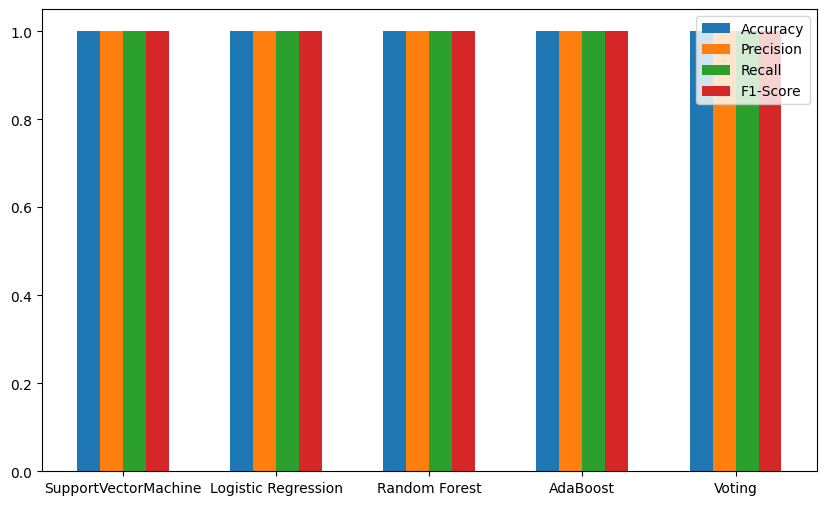

In [28]:
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width*1.5, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x - width/2, precision_scores, width, label='Precision')
rects3 = ax.bar(x + width/2, recall_scores, width, label='Recall')
rects4 = ax.bar(x + width*1.5, f1_scores, width, label='F1-Score')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()